Monday, April 25,2018                             
Aizhong Lei
#  PCA applied in portfolio analysis

#  1. Goal of the project.
The project is intended to gain a general method of portfolio analysis by multivariate statistics and analysis, e.g. variance-covariance analysis, PCA, etc. It will acquire the least risk and maximum return to manage a portfolio or allocate the assets. The project will implement a general method and provide a technical support for passive or active investment. 

#  2. The sources of data
The stocks prices data will directly be downloaded from quandl. Dow Jones index from yahoo. Yahoo or google finances have stoped some severice. We will only choose 26 companies stocks and Dow Jones index for analysis.The date of stocks trade price are from Jan.1,2005 to Apr.17,2018 and deleted the missing data NA. 

# (1) Import the moduals and Get the data (download the stocks' data)

In [1]:
import numpy as np
import pandas as pd
# import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA as sklearnPCA
import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA as sklearnPCA

In [ ]:
# Download the financial data of stocks from the quandl. you can download the data from yahoo finance.
# import pandas_datareader.data as web
# start='2005-01-01' 
# end='2018-04-21'
# n=0
# symbols=['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DIS','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','MCD','MRK','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT']
# # '^DJI',

# for sn in symbols: # us_stock_symbol:
#     ab=str(sn)
#     fsn=ab +".csv"
#     try:
#         dl = web.DataReader(ab, 'quandl', start, end)
#         dl.to_csv(fsn)
#     except:
#         pass
#     n=n+1
#     dl=[]
#     if n%5==0:
#         print(n)

In [27]:
# Get the stocks' price data
symbols=['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DIS','XOM','GE','GS','HD','IBM','INTC','JNJ','MCD','MRK','NKE','PFE','PG','UTX','UNH','VZ','V','WMT']
data = pd.DataFrame() 
mydata = pd.DataFrame()
for sn in symbols: 
    ab=str(sn)   
    aa=ab + '.csv'   
    data = pd.read_csv(aa)
    data.index=data.Date
    mydata[ab] = data['AdjClose']
    
stocks_data=mydata.dropna()

In [4]:
stocks_data

MMM        AXP        AAPL          BA         CAT  \
Date                                                                    
2018-03-07  235.570000  95.640000  175.030000  347.040000  151.510000   
2018-03-06  233.660000  96.070000  176.670000  348.920000  153.750000   
2018-03-05  232.810000  96.660000  176.820000  352.750000  151.120000   
2018-03-02  230.370000  95.600000  176.210000  344.670000  146.380000   
2018-03-01  231.340000  95.140000  175.000000  349.690000  150.230000   
2017-12-05  238.260000  98.710000  169.640000  275.540000  140.140000   
2017-11-28  235.630000  95.280000  173.070000  267.990000  138.990000   
2017-11-27  234.000000  93.470000  174.090000  265.580000  137.190000   
2017-11-21  234.090000  94.410000  173.140000  266.990000  137.600000   
2017-11-20  231.490000  93.950000  169.980000  264.630000  136.910000   
2017-11-17  229.360000  93.690000  170.150000  262.260000  136.130000   
2017-11-15  227.400000  93.260000  169.080000  262.860000  134.100000   
2017-11-09  228.390000  93.750000  175.880000  262.700000  135.340000   
2017-11-07  230.050000  95.370000  174.810000  264.699194  138.810000   
2017-11-06  230.310000  96.290000  174.250000  262.650269  137.710000   
2017-11-03  232.220000  96.430000  172.500000  260.342742  136.630000   
2017-11-02  232.230000  95.980000  168.110000  261.218011  136.470000   
2017-11-01  230.180000  95.790000  166.890000  257.110215  136.290000   
2017-10-31  230.190000  95.520000  169.040000  256.593011  135.800000   
2017-10-30  231.020000  95.070000  166.720000  257.856183  136.490000   
2017-10-27  234.740000  95.790000  163.050000  255.081183  137.810000   
2017-10-26  232.940000  95.690000  157.410000  257.876075  136.940000   
2017-10-25  237.920000  93.550000  156.405000  257.000806  136.835000   
2017-10-24  234.650000  93.860000  157.100000  264.569892  138.240000   
2017-10-23  221.550000  92.380000  156.170000  260.909677  131.680000   
2017-10-20  221.320000  92.090000  156.160000  263.326613  131.360000   
2017-10-19  219.240000  91.900000  155.980000  257.647312  130.773483   
2017-10-18  218.270000  92.080000  159.760000  258.641935  130.515017   
2017-10-17  217.750000  91.690000  160.470000  257.229570  129.769445   
2017-10-16  218.720000  91.960000  159.880000  258.353495  130.693955   
...                ...        ...         ...         ...         ...   
2008-04-30   59.904127  40.773909   22.354999   65.493333   61.728372   
2008-04-29   59.872968  40.765418   22.496365   66.010426   61.449434   
2008-04-28   60.083295  40.663526   22.135241   65.585946   62.595344   
2008-04-25   60.620796  40.561633   21.812671   65.477897   62.007311   
2008-04-24   61.641269  38.362457   21.711145   64.057820   61.683139   
2008-04-23   62.809750  37.683175   20.933635   63.355499   61.585134   
2008-04-22   63.238193  37.335043   20.587933   60.631112   61.826378   
2008-04-21   64.141819  38.803991   21.610904   61.040156   62.821510   
2008-04-18   64.578052  38.659643   20.695885   60.708291   64.291593   
2008-04-17   62.825330  37.954888   19.854118   59.357674   59.248080   
2008-04-16   62.856489  37.148241   19.752592   59.172446   59.300611   
2008-04-15   61.415363  36.638779   19.068898   58.423819   56.996728   
2008-04-14   60.963550  36.273665   18.991790   59.596926   56.689043   
2008-04-11   61.127138  36.842564   18.909541   59.319085   56.133710   
2008-04-10   62.591634  38.260565   19.861829   60.530781   56.816620   
2008-04-09   61.999603  38.277547   19.462151   60.661984   57.154323   
2008-04-08   62.225510  39.300875   19.642070   57.899008   58.227467   
2008-04-07   62.466996  39.368533   20.034038   57.868137   57.972314   
2008-04-04   62.724062  38.996414   19.672914   58.385230   58.407575   
2008-04-03   62.451416  39.478478   19.483998   58.763403   57.837233   
2008-04-02   63.027867  39.453106   18.954521   59.311367   58.917882   
2008-04-01   63.347252  39.825225   19.216702   58.562740   60.021044   
2008

In [57]:
#get the DowJones index and calculate the ret of DJ index.
ab='^DJI'+'.csv'
data=[]
data = pd.read_csv(ab)
data.index=data.Date
dji=data['Adj Close']
dji=pd.DataFrame(data =dji.values,columns=['^DJI'], index= data.index)
dji=dji.loc[stocks_data.index]

In [62]:
dji.pct_change()

^DJI
Date                
2008-03-19       NaN
2008-03-20  0.021625
2008-03-24  0.015154
2008-03-25 -0.001278
2008-03-26 -0.008756
2008-03-27 -0.009692
2008-03-28 -0.006995
2008-03-31  0.003805
2008-04-01  0.031923
2008-04-02 -0.003591
2008-04-03  0.001357
2008-04-04 -0.001316
2008-04-07  0.000239
2008-04-08 -0.002853
2008-04-09 -0.003911
2008-04-10  0.004368
2008-04-11 -0.020391
2008-04-14 -0.001895
2008-04-15  0.004911
2008-04-16  0.020773
2008-04-17  0.000097
2008-04-18  0.018135
2008-04-21 -0.001894
2008-04-22 -0.008171
2008-04-23  0.003380
2008-04-24  0.006717
2008-04-25  0.003340
2008-04-28 -0.001560
2008-04-29 -0.003093
2008-04-30 -0.000920
...              ...
2017-10-16  0.003727
2017-10-17  0.001763
2017-10-18  0.006964
2017-10-19  0.000235
2017-10-20  0.007149
2017-10-23 -0.002343
2017-10-24  0.007210
2017-10-25 -0.004791
2017-10-26  0.003060
2017-10-27  0.001424
2017-10-30 -0.003646
2017-10-31  0.001221
2017-11-01  0.002471
2017-11-02  0.003467
2017-11-03  0.000975
2017-11-06  0.000392
2017-11-07  0.000374
2017-11-09 -0.004045
2017-11-15 -0.008126
2017-11-17  0.003737
2017-11-20  0.003086
2017-11-21  0.006850
2017-11-27 -0.000426
2017-11-28  0.010853
2017-12-05  0.014429
2018-03-01  0.017714
2018-03-02 -0.002882
2018-03-05  0.013722
2018-03-06  0.000376
2018-03-07 -0.003326

[2441 rows x 1 columns]

In [6]:
dji.index  #  We choose the date of stocks price from Mar.19,2008 to Mar.7,2018 for following analysis

Index(['2018-03-07', '2018-03-06', '2018-03-05', '2018-03-02', '2018-03-01',
       '2017-12-05', '2017-11-28', '2017-11-27', '2017-11-21', '2017-11-20',
       ...
       '2008-04-02', '2008-04-01', '2008-03-31', '2008-03-28', '2008-03-27',
       '2008-03-26', '2008-03-25', '2008-03-24', '2008-03-20', '2008-03-19'],
      dtype='object', name='Date', length=2441)

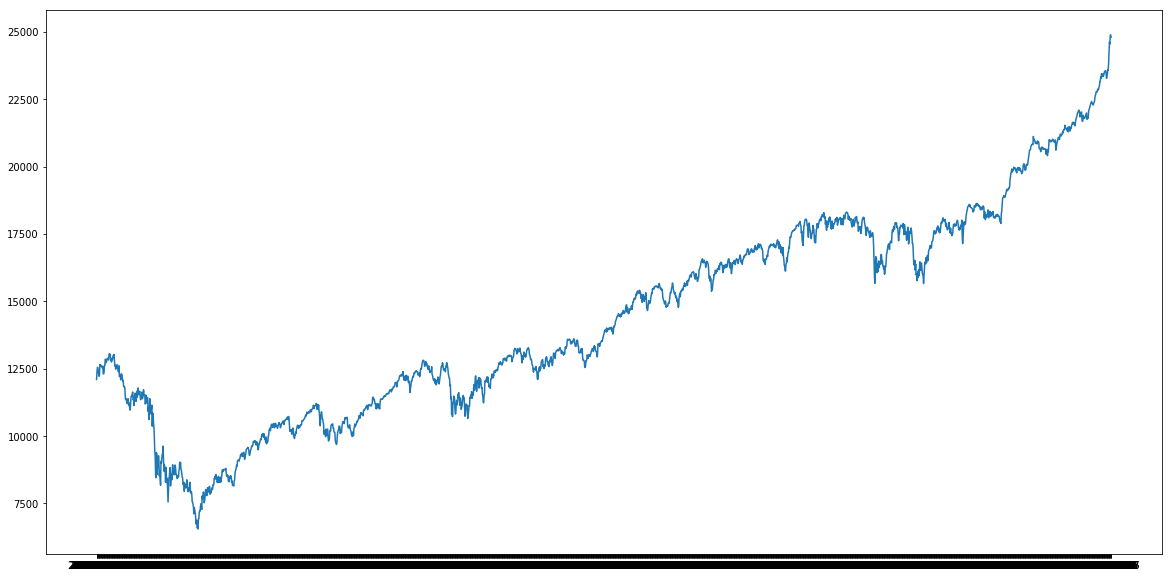

In [7]:
plt.figure(figsize=(20,10))
plt.plot(dji)
plt.show()

# (2).Basic statistic summary

In [8]:
stocks_data.describe()

MMM          AXP         AAPL           BA          CAT  \
count  2441.000000  2441.000000  2441.000000  2441.000000  2441.000000   
mean    107.625375    56.315886    70.890760    93.726397    71.862808   
std      48.355821    21.338054    40.824177    51.479920    21.960443   
min      33.672489     8.875698    10.049790    23.321921    17.159107   
25%      68.791795    38.858203    33.921254    55.851657    59.670610   
50%      88.510027    54.944500    68.529525    66.907732    73.918162   
75%     148.299997    75.955993   103.863957   124.555538    84.947111   
max     238.260000    98.710000   176.820000   352.750000   153.750000   

               CVX         CSCO           KO          DIS          XOM  \
count  2441.000000  2441.000000  2441.000000  2441.000000  2441.000000   
mean     84.079669    21.037395    31.668708    60.529482    71.128810   
std      20.112272     5.766996     8.557309    32.012804    11.732751   
min      41.228453    11.255228    14.472317    13.922784    45.231260   
25%      65.247960    16.486182    22.966333    30.640314    60.693191   
50%      86.668339    19.899111    33.067728    50.516529    73.969843   
75%     100.847767    25.286649    38.554842    94.439330    80.451884   
max     120.390000    44.520000    46.810000   118.257296    92.545338   

          ...               MCD          MRK          NKE          PFE  \
count     ...       2441.000000  2441.000000  2441.000000  2441.000000   
mean      ...         82.049407    39.859092    32.135858    21.876196   
std       ...         29.974930    14.125889    16.863331     8.103784   
min       ...         38.696321    15.258534     8.592525     8.399014   
25%       ...         58.281858    27.214830    17.128398    13.557846   
50%       ...         82.917875    37.952551    25.730531    22.486296   
75%       ...         91.611052    53.050240    50.313257    29.917331   
max       ...        172.990000    66.160000    66.119304    36.121622   

                PG          UTX          UNH           VZ            V  \
count  2441.000000  2441.000000  2441.000000  2441.000000  2441.000000   
mean     63.191022    80.543616    73.649917    34.605455    44.185146   
std      14.994721    23.976106    50.056322    11.216943    27.577865   
min      33.487657    30.634647    14.487278    15.146474     9.945737   
25%      49.906472    60.708179    31.009021    22.338714    18.589359   
50%      60.635722    78.705388    52.821075    36.459639    37.913434   
75%      75.368968   101.969893   111.894339    43.596876    67.962189   
max      93.694148   131.710000   227.620354    54.377053   121.880000   

               WMT  
count  2441.000000  
mean     58.540320  
std      13.233127  
min      37.218580  
25%      44.984434  
50%      61.369104  
75%      69.351909  
max      97.830000  

[8 rows x 26 columns]

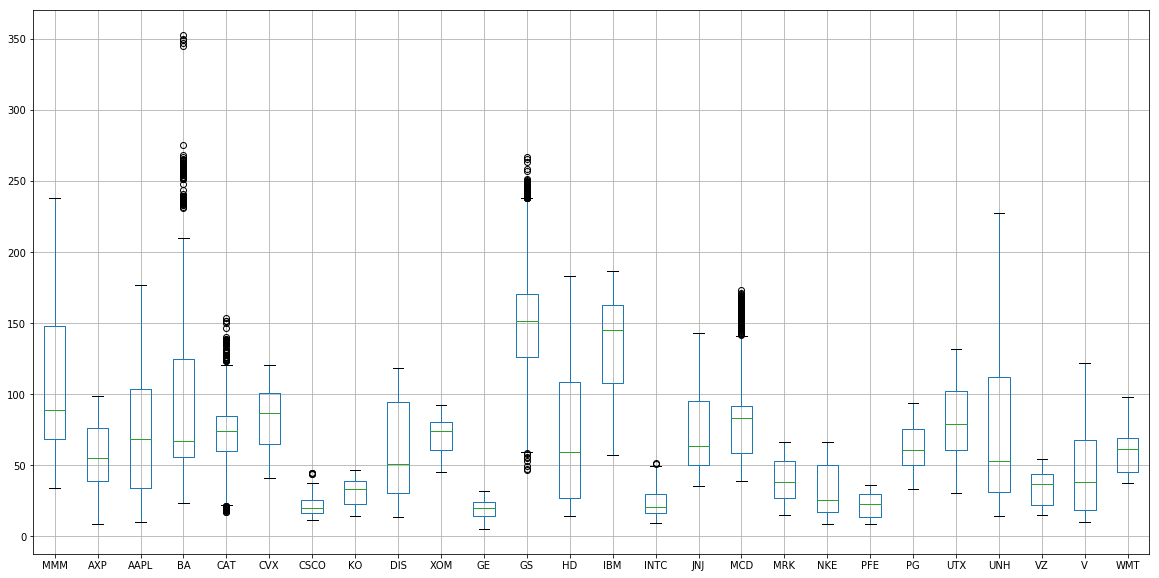

In [9]:
plt.figure(figsize=(20,10))
pd.DataFrame.boxplot(stocks_data)
plt.show() # Stocks' price are different and the differnence are big, Variance of stocks price varied. 
# The investor focus on the return. The stocks' price are the initial data. We choose the return data for the analysis.

# 3. Principal Component Analysis of Stocks' Returns

# (1). PCA's thinking for the stocks' return analysis

Principal component analysis today has become a popular tool in finance.

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.
From Wikipedia, the technique is defined as follws:
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is min(m-1,p). This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.
In quantitative finance, principal component analysis can be directly applied to the risk management of interest rate derivatives portfolios.[1] Trading multiple swap instruments which are usually a function of 30-500 other market quotable swap instruments is sought to be reduced to usually 3 or 4 principal components, representing the path of interest rates on a macro basis. Converting risks to be represented as those to factor loadings (or multipliers) provides assessments and understanding beyond that available to simply collectively viewing risks to individual 30-500 buckets.

PCA has also been applied to share portfolios in a similar fashion.[2] One application is to reduce portfolio risk, where allocation strategies are applied to the "principal portfolios" instead of the underlying stocks.[3] A second is to enhance portfolio return, using the principal components to select stocks with upside potential.[4]

References: [1] The Pricing and Hedging of Interest Rate Derivatives: A Practical Guide to Swaps, J H M Darbyshire, 2016, ISBN 978-0995455511
[2] Giorgia Pasini (2017). Principal Component Analysis for Stock Portfolio Management. International Journal of Pure and Applied Mathematics. Volume 115 No. 1 2017, 153-167
[3] Libin Yang. An Application of Principal Component Analysis to Stock Portfolio Management. Department of Economics and Finance, University of Canterbury, January 2015.
[4] CA Hargreaves, Chandrika Kadirvel Mani (2015). [files.aiscience.org/journal/article/pdf/70210034.pdf The Selection of Winning Stocks Using Principal Component Analysis]. American Journal of Marketing Research. Vol. 1, No. 3, 2015, pp. 183-188

We going to apply principal component analysis on equity return covariance matrix to construct principal component portfolios because they have some interesting characteristics. The weights are based on the eigenvectors.

For example, the first PC is a factor that captures maximal amount of covariation = linear combination of assets that has highest possible variance. Second PC factor is second most variable portfolio that is orthogonal to first PC.

The principal components are just statistical factors that contain no real meaning. However, many findings suggest that the first principal component portfolio is related the market portfolio (at least close to) or the market risk premium from the CAPM model

The stock price movements of all stocks taken together determined the movemeent of the index. In addition, the stock price movements of single stocks are generally correlated, for example, due to the general economic ondditions or certain developments in certain sectors.
For statistic applications, it is generally quite to use some factors to explaied the movement of a stock index. But the PCA derives uncorrelated components that are good sited to explained the movement of the stock index. One can think of these componenets as linear combinations(portfolios) of selected stocks from the index. 

References: [5]Giorgia Pasini, PRINCIPAL COMPONENT ANALYSIS FOR STOCK PORTFOLIO MANAGEMENT, International Journal of Pure and Applied Mathematics, Volume 115 No. 1 2017, 153-167. 
[6]Kritzman, Mark,YuanzhenLi, SebastienPage, andRobertoRigobon. 2011. Principal Components as a measure of systemic risk. Journal of Portfolio Management 37: 112–26.
[7]Libin Yang, William Rea and Alethea Rea, Financial Insights from the Last Few Components of a Stock Market PCA, Int.J.Financial Stud. 2017, 5, 15     

# (2). Step by step of PCA  analysis for the stocks' return

Now, many people choose different data in the proceeding of PCA analysis. for example, stocks' price or genernalized stocks'price, weekly or monthly. Here, we choose the daily returns of stocks to implement the pca analysis. The Dow Jones Industrial Average index is caluculated the daily return index for compare with the stocks' returns.


# (a) Calculate returns and the covariance matrix of the returns of stocks

In [28]:
stocks_data=stocks_data.sort_index(axis=0,ascending=True)
#calc_returns = lambda x: np.log(x / x.shift(1))[1:]  
#stocks_ret = stocks_data.apply(calc_returns)  # get stocks' return
stocks_ret = stocks_data.pct_change()
stocks_ret = stocks_ret.dropna() # skip the first row (NaN)
len(stocks_ret)

2440

In [29]:
stocks_ret.head()

MMM       AXP      AAPL        BA       CAT       CVX  \
Date                                                                     
2008-03-20 -0.018749  0.094762  0.027763  0.018380  0.001221  0.016119   
2008-03-24  0.008464  0.031100  0.046972  0.019920  0.029938  0.009614   
2008-03-25  0.004323  0.002109  0.010392 -0.005112  0.008023  0.006309   
2008-03-26 -0.004052 -0.045254  0.028940  0.005270  0.009395  0.004968   
2008-03-27 -0.010170 -0.011684 -0.033159 -0.027261 -0.004266 -0.006591   

                CSCO        KO       DIS       XOM    ...          MCD  \
Date                                                  ...                
2008-03-20  0.012260  0.018012  0.021127  0.006751    ...     0.014163   
2008-03-24  0.035123  0.002294  0.004389  0.011176    ...     0.024807   
2008-03-25  0.004290  0.003759  0.001248 -0.008726    ...     0.007710   
2008-03-26 -0.037670 -0.004234 -0.009975  0.012441    ...    -0.010676   
2008-03-27 -0.024213  0.002617 -0.011965 -0.000696    ...    -0.002698   

                 MRK       NKE       PFE        PG       UTX       UNH  \
Date                                                                     
2008-03-20  0.008607  0.087983 -0.000970  0.023005  0.003636 -0.006470   
2008-03-24  0.020526  0.026906  0.000971  0.008649  0.019273  0.011042   
2008-03-25  0.009492 -0.010278  0.008248 -0.006145 -0.002559 -0.012041   
2008-03-26  0.000672 -0.030715 -0.004331  0.001438 -0.007839 -0.033447   
2008-03-27  0.001790 -0.004376 -0.006283 -0.003303 -0.002873 -0.002933   

                  VZ         V       WMT  
Date                                      
2008-03-20  0.028181  0.138938  0.048247  
2008-03-24  0.023533 -0.071795  0.007515  
2008-03-25 -0.001893  0.058932 -0.010815  
2008-03-26 -0.020596  0.011225 -0.002828  
2008-03-27 -0.004981 -0.016417 -0.010019  

[5 rows x 26 columns]

In [30]:
ret_sigma=stocks_ret.cov()
ret_sigma

MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
MMM   0.000192  0.000202  0.000122  0.000149  0.000186  0.000148  0.000148   
AXP   0.000202  0.000602  0.000220  0.000244  0.000303  0.000225  0.000239   
AAPL  0.000122  0.000220  0.000372  0.000154  0.000191  0.000143  0.000179   
BA    0.000149  0.000244  0.000154  0.000359  0.000230  0.000168  0.000192   
CAT   0.000186  0.000303  0.000191  0.000230  0.000439  0.000228  0.000222   
CVX   0.000148  0.000225  0.000143  0.000168  0.000228  0.000298  0.000169   
CSCO  0.000148  0.000239  0.000179  0.000192  0.000222  0.000169  0.000355   
KO    0.000083  0.000120  0.000075  0.000092  0.000101  0.000104  0.000091   
DIS   0.000155  0.000264  0.000151  0.000186  0.000216  0.000187  0.000184   
XOM   0.000134  0.000192  0.000119  0.000148  0.000193  0.000232  0.000149   
GE    0.000177  0.000304  0.000174  0.000172  0.000236  0.000194  0.000172   
GS    0.000184  0.000398  0.000213  0.000230  0.000284  0.000228  0.000242   
HD    0.000135  0.000237  0.000145  0.000153  0.000178  0.000145  0.000159   
IBM   0.000107  0.000166  0.000125  0.000128  0.000154  0.000131  0.000143   
INTC  0.000140  0.000238  0.000175  0.000177  0.000214  0.000162  0.000207   
JNJ   0.000089  0.000119  0.000073  0.000085  0.000098  0.000107  0.000089   
MCD   0.000084  0.000127  0.000087  0.000092  0.000103  0.000101  0.000090   
MRK   0.000109  0.000175  0.000105  0.000123  0.000136  0.000143  0.000127   
NKE   0.000125  0.000222  0.000143  0.000171  0.000180  0.000133  0.000168   
PFE   0.000108  0.000176  0.000103  0.000122  0.000141  0.000133  0.000121   
PG    0.000088  0.000128  0.000074  0.000080  0.000093  0.000108  0.000087   
UTX   0.000151  0.000227  0.000147  0.000199  0.000215  0.000162  0.000177   
UNH   0.000138  0.000235  0.000159  0.000170  0.000175  0.000179  0.000158   
VZ    0.000102  0.000158  0.000095  0.000101  0.000128  0.000125  0.000115   
V     0.000125  0.000265  0.000164  0.000164  0.000191  0.000150  0.000172   
WMT   0.000073  0.000105  0.000069  0.000073  0.000082  0.000086  0.000083   

            KO       DIS       XOM    ...          MCD       MRK       NKE  \
MMM   0.000083  0.000155  0.000134    ...     0.000084  0.000109  0.000125   
AXP   0.000120  0.000264  0.000192    ...     0.000127  0.000175  0.000222   
AAPL  0.000075  0.000151  0.000119    ...     0.000087  0.000105  0.000143   
BA    0.000092  0.000186  0.000148    ...     0.000092  0.000123  0.000171   
CAT   0.000101  0.000216  0.000193    ...     0.000103  0.000136  0.000180   
CVX   0.000104  0.000187  0.000232    ...     0.000101  0.000143  0.000133   
CSCO  0.000091  0.000184  0.000149    ...     0.000090  0.000127  0.000168   
KO    0.000138  0.000106  0.000095    ...     0.000070  0.000086  0.000086   
DIS   0.000106  0.000301  0.000165    ...     0.000104  0.000142  0.000167   
XOM   0.000095  0.000165  0.000240    ...     0.000093  0.000132  0.000120   
GE    0.000100  0.000205  0.000171    ...     0.000113  0.000142  0.000162   
GS    0.000107  0.000243  0.000188    ...     0.000109  0.000158  0.000191   
HD    0.000091  0.000176  0.000124    ...     0.000101  0.000117  0.000164   
IBM   0.000072  0.000135  0.000116    ...     0.000072  0.000094  0.000117   
INTC  0.000091  0.000173  0.000145    ...     0.000088  0.000126  0.000152   
JNJ   0.000070  0.000103  0.000101    ...     0.000064  0.000102  0.000079   
MCD   0.000070  0.000104  0.000093    ...     0.000139  0.000082  0.000098   
MRK   0.000086  0.000142  0.000132    ...     0.000082  0.000265  0.000108   
NKE   0.000086  0.000167  0.000120    ...     0.000098  0.000108  0.000326   
PFE   0.000080  0.000134  0.000122    ...     0.000075  0.000144  0.000105   
PG    0.000078  0.000111  0.000104    ...     0.000072  0.000093  0.000085   
UTX   0.000092  0.000176  0.000142    ...     0.000090  0.000118  0.000148   
UNH   0.000111  0.000182  0.000154    ...     0.000102  0.000156  0.000143   
VZ    0.000079  0.000125  0.0001

In [31]:
stocks_ret.corr()

MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
MMM   1.000000  0.593768  0.456731  0.567985  0.639020  0.619852  0.564422   
AXP   0.593768  1.000000  0.463510  0.524104  0.589936  0.532218  0.516006   
AAPL  0.456731  0.463510  1.000000  0.420154  0.472519  0.430211  0.491335   
BA    0.567985  0.524104  0.420154  1.000000  0.578587  0.512821  0.537343   
CAT   0.639020  0.589936  0.472519  0.578587  1.000000  0.631171  0.560673   
CVX   0.619852  0.532218  0.430211  0.512821  0.631171  1.000000  0.518941   
CSCO  0.564422  0.516006  0.491335  0.537343  0.560673  0.518941  1.000000   
KO    0.508868  0.414616  0.332187  0.415178  0.408255  0.512714  0.410819   
DIS   0.644597  0.621190  0.451545  0.567609  0.594092  0.625081  0.564084   
XOM   0.625041  0.504923  0.398117  0.505586  0.594932  0.868449  0.508440   
GE    0.623179  0.604475  0.439904  0.443899  0.548748  0.547468  0.446376   
GS    0.537309  0.656305  0.445714  0.490855  0.548547  0.533663  0.518792   
HD    0.585321  0.580778  0.451641  0.486684  0.511953  0.504853  0.508832   
IBM   0.557035  0.488438  0.465918  0.488062  0.531265  0.547233  0.547337   
INTC  0.564571  0.542240  0.507418  0.521997  0.570531  0.524735  0.613009   
JNJ   0.610155  0.457601  0.356685  0.425574  0.445136  0.584571  0.449126   
MCD   0.514994  0.440641  0.385045  0.411027  0.418120  0.497477  0.406176   
MRK   0.481033  0.436757  0.334832  0.398357  0.397305  0.507557  0.414798   
NKE   0.501175  0.500374  0.410138  0.498923  0.476186  0.426415  0.492521   
PFE   0.550358  0.505954  0.377253  0.454017  0.472835  0.541749  0.452613   
PG    0.554160  0.456048  0.333430  0.369103  0.388281  0.543688  0.402063   
UTX   0.715259  0.605700  0.500491  0.689860  0.671310  0.614546  0.615122   
UNH   0.465113  0.445956  0.384549  0.419743  0.388984  0.483392  0.390442   
VZ    0.542122  0.474913  0.364003  0.391740  0.450267  0.531542  0.450593   
V     0.463276  0.557083  0.438543  0.445768  0.469349  0.447247  0.471216   
WMT   0.425677  0.347062  0.291195  0.312657  0.318377  0.402176  0.358872   

            KO       DIS       XOM    ...          MCD       MRK       NKE  \
MMM   0.508868  0.644597  0.625041    ...     0.514994  0.481033  0.501175   
AXP   0.414616  0.621190  0.504923    ...     0.440641  0.436757  0.500374   
AAPL  0.332187  0.451545  0.398117    ...     0.385045  0.334832  0.410138   
BA    0.415178  0.567609  0.505586    ...     0.411027  0.398357  0.498923   
CAT   0.408255  0.594092  0.594932    ...     0.418120  0.397305  0.476186   
CVX   0.512714  0.625081  0.868449    ...     0.497477  0.507557  0.426415   
CSCO  0.410819  0.564084  0.508440    ...     0.406176  0.414798  0.492521   
KO    1.000000  0.521538  0.523715    ...     0.505482  0.451181  0.406562   
DIS   0.521538  1.000000  0.614650    ...     0.508573  0.503193  0.534339   
XOM   0.523715  0.614650  1.000000    ...     0.512386  0.521236  0.429928   
GE    0.415882  0.576542  0.537546    ...     0.469074  0.426407  0.438457   
GS    0.369129  0.566369  0.492174    ...     0.373659  0.393590  0.427937   
HD    0.468086  0.609999  0.482394    ...     0.518485  0.431134  0.546845   
IBM   0.438949  0.560789  0.542243    ...     0.444096  0.417714  0.467261   
INTC  0.433277  0.558896  0.522330    ...     0.418622  0.432245  0.470142   
JNJ   0.566552  0.560919  0.616141    ...     0.511309  0.595119  0.411906   
MCD   0.505482  0.508573  0.512386    ...     1.000000  0.427444  0.462323   
MRK   0.451181  0.503193  0.521236    ...     0.427444  1.000000  0.366657   
NKE   0.406562  0.534339  0.429928    ...     0.462323  0.366657  1.000000   
PFE   0.477432  0.546197  0.555569    ...     0.451856  0.622469  0.409980   
PG    0.582083  0.557135  0.582767    ...     0.534141  0.496280  0.408936   
UTX   0.514763  0.665346  0.601812    ...     0.500591  0.474191  0.536581   
UNH   0.440720  0.488575  0.463224    ...     0.405272  0.445854  0.369381   
VZ    0.492284  0.529929  0.5456

In [64]:
##get the return of DJ index
dji_ret=dji.pct_change()
dji_ret=dji_ret[1:]

In [65]:
# Calculate the correlation between the index and stocks
codata=stocks_ret
codata['^DJI']=dji_ret

In [66]:
codata

MMM       AXP      AAPL        BA       CAT       CVX  \
Date                                                                     
2008-03-20 -0.018749  0.094762  0.027763  0.018380  0.001221  0.016119   
2008-03-24  0.008464  0.031100  0.046972  0.019920  0.029938  0.009614   
2008-03-25  0.004323  0.002109  0.010392 -0.005112  0.008023  0.006309   
2008-03-26 -0.004052 -0.045254  0.028940  0.005270  0.009395  0.004968   
2008-03-27 -0.010170 -0.011684 -0.033159 -0.027261 -0.004266 -0.006591   
2008-03-28  0.001156 -0.037475  0.019679 -0.010105  0.000779  0.001185   
2008-03-31  0.015394  0.013210  0.003426  0.012250  0.015566  0.010178   
2008-04-01  0.027416  0.077081  0.042022  0.020304  0.021586  0.016167   
2008-04-02 -0.005042 -0.009344 -0.013643  0.012783 -0.018380  0.008877   
2008-04-03 -0.009146  0.000643  0.027934 -0.009239 -0.018342  0.002400   
2008-04-04  0.004366 -0.012211  0.009696 -0.006436  0.009861  0.003762   
2008-04-07 -0.004098  0.009542  0.018356 -0.008857 -0.007452  0.002499   
2008-04-08 -0.003866 -0.001719 -0.019565  0.000533  0.004401  0.011442   
2008-04-09 -0.003630 -0.026038 -0.009160  0.047721 -0.018430  0.007504   
2008-04-10  0.009549 -0.000444  0.020536 -0.002163 -0.005909 -0.003891   
2008-04-11 -0.023398 -0.037062 -0.047946 -0.020018 -0.012020 -0.008929   
2008-04-14 -0.002676 -0.015441  0.004350  0.004684  0.009893  0.005631   
2008-04-15  0.007411  0.010066  0.004060 -0.019684  0.005428  0.009742   
2008-04-16  0.023465  0.013905  0.035854  0.012814  0.040421  0.019519   
2008-04-17 -0.000496  0.021714  0.005140  0.003130 -0.000886  0.000653   
2008-04-18  0.027898  0.018568  0.042398  0.022754  0.085125  0.012936   
2008-04-21 -0.006755  0.003734  0.044213  0.005467 -0.022866 -0.005151   
2008-04-22 -0.014088 -0.037856 -0.047336 -0.006701 -0.015841  0.014347   
2008-04-23 -0.006775  0.009325  0.016792  0.044934 -0.003902  0.004786   
2008-04-24 -0.018603  0.018026  0.037142  0.011085  0.001591 -0.022015   
2008-04-25 -0.016555  0.057326  0.004676  0.022169  0.005255  0.003139   
2008-04-28 -0.008867  0.002512  0.014788  0.001650  0.009483 -0.002050   
2008-04-29 -0.003501  0.002506  0.016314  0.006472 -0.018307  0.024216   
2008-04-30  0.000520  0.000208 -0.006284 -0.007834  0.004539  0.014883   
2008-05-01  0.012224  0.068930  0.034780  0.006481  0.005740 -0.012585   
...              ...       ...       ...       ...       ...       ...   
2017-10-16  0.004593 -0.009692  0.018409 -0.003797  0.005814  0.008140   
2017-10-17 -0.004435 -0.002936  0.003690 -0.004350 -0.007074  0.000749   
2017-10-18  0.002388  0.004253 -0.004425  0.005491  0.005745 -0.017218   
2017-10-19  0.004444 -0.001955 -0.023660 -0.003846  0.001980  0.000423   
2017-10-20  0.009487  0.002067  0.001154  0.022043  0.004485  0.003723   
2017-10-23  0.001039  0.003149  0.000064 -0.009178  0.002436  0.002444   
2017-10-24  0.059129  0.016021  0.005955  0.014029  0.049818  0.002522   
2017-10-25  0.013936 -0.003303 -0.004424 -0.028609 -0.010163 -0.005997   
2017-10-26 -0.020931  0.022875  0.006426  0.003406  0.000767 -0.000633   
2017-10-27  0.007727  0.001045  0.035830 -0.010838  0.006353 -0.041371   
2017-10-30 -0.015847 -0.007516  0.022508  0.010879 -0.009578  0.007486   
2017-10-31 -0.003593  0.004733  0.013916 -0.004899 -0.005055  0.013113   
2017-11-01 -0.000043  0.002827 -0.012719  0.002016  0.003608  0.000086   
2017-11-02  0.008906  0.001984  0.007310  0.015977  0.001321 -0.004918   
2017-11-03 -0.000043  0.004688  0.026114 -0.003351  0.001172 -0.002948   
2017-11-06 -0.008225 -0.001452  0.010145  0.008863  0.007905  0.017828   
2017-11-07 -0.001129 -0.009554  0.003214  0.007801  0.007988  0.001709   
2017-11-09 -0.007216 -0.016986  0.006121 -0.007553 -0.024998  0.000000   
2017-11-15 -0.004335 -0.005227 -0.038663  0.000609 -0.009162 -0.006738   
2017-11-17  0.008619  0.004611  0.006328 -0.002283  0.015138 -0.014942   
2017-11-20  0.009287  0.002775 -0.000999  0.009037  0.005730  0.000087   
2017-11-21  0.011232 

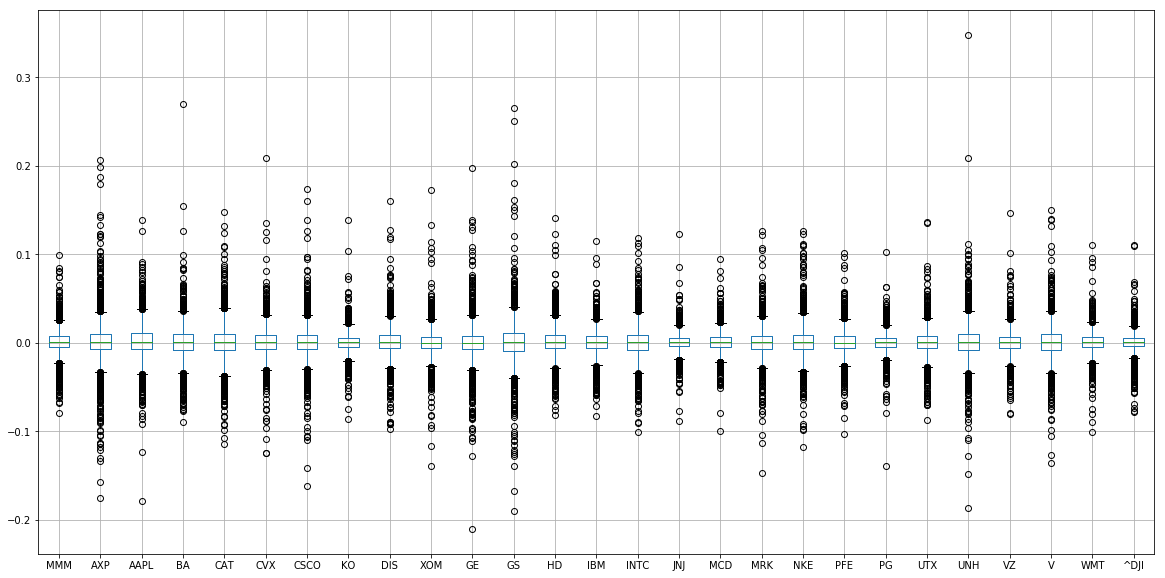

In [67]:
plt.figure(figsize=(20,10))
pd.DataFrame.boxplot(codata)
plt.show()

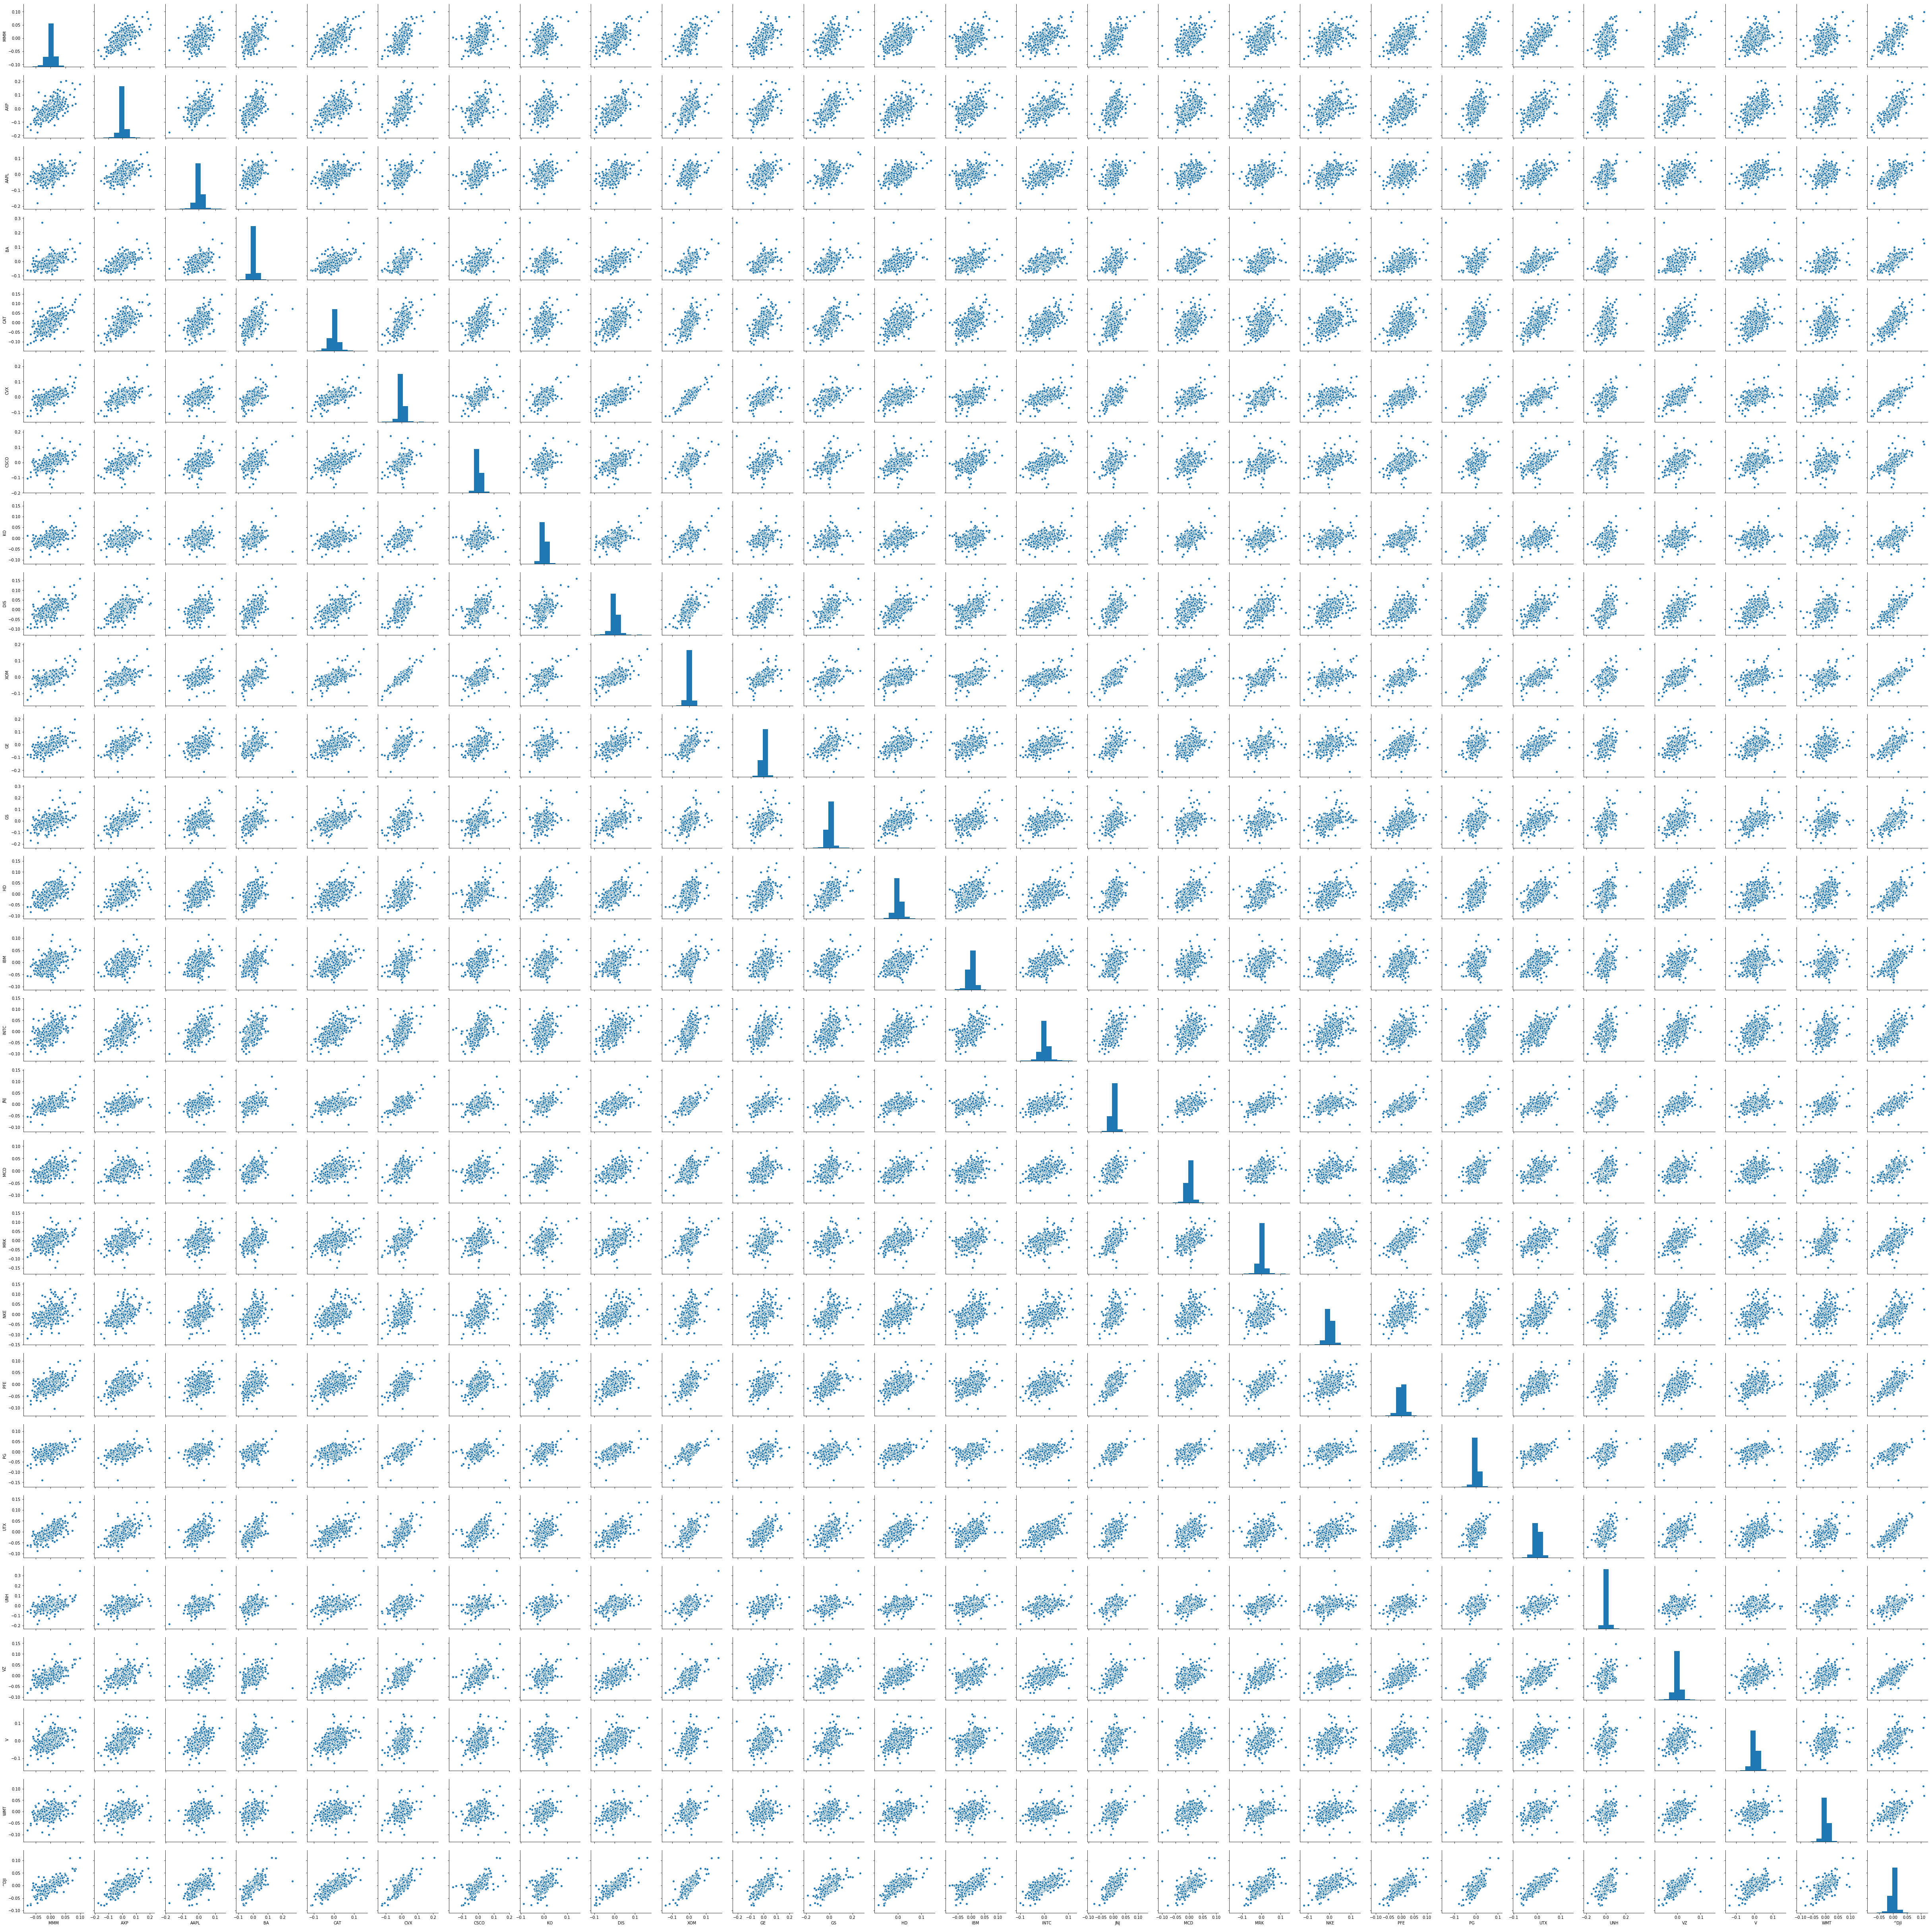

In [68]:
import seaborn as sns
sns.pairplot(codata)
plt.show()

In [69]:
ret_cor=codata.corr()
ret_cor   ## we can observe the correlation between the stocks or stock and DJ industry index

MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
MMM   1.000000  0.593768  0.456731  0.567985  0.639020  0.619852  0.564422   
AXP   0.593768  1.000000  0.463510  0.524104  0.589936  0.532218  0.516006   
AAPL  0.456731  0.463510  1.000000  0.420154  0.472519  0.430211  0.491335   
BA    0.567985  0.524104  0.420154  1.000000  0.578587  0.512821  0.537343   
CAT   0.639020  0.589936  0.472519  0.578587  1.000000  0.631171  0.560673   
CVX   0.619852  0.532218  0.430211  0.512821  0.631171  1.000000  0.518941   
CSCO  0.564422  0.516006  0.491335  0.537343  0.560673  0.518941  1.000000   
KO    0.508868  0.414616  0.332187  0.415178  0.408255  0.512714  0.410819   
DIS   0.644597  0.621190  0.451545  0.567609  0.594092  0.625081  0.564084   
XOM   0.625041  0.504923  0.398117  0.505586  0.594932  0.868449  0.508440   
GE    0.623179  0.604475  0.439904  0.443899  0.548748  0.547468  0.446376   
GS    0.537309  0.656305  0.445714  0.490855  0.548547  0.533663  0.518792   
HD    0.585321  0.580778  0.451641  0.486684  0.511953  0.504853  0.508832   
IBM   0.557035  0.488438  0.465918  0.488062  0.531265  0.547233  0.547337   
INTC  0.564571  0.542240  0.507418  0.521997  0.570531  0.524735  0.613009   
JNJ   0.610155  0.457601  0.356685  0.425574  0.445136  0.584571  0.449126   
MCD   0.514994  0.440641  0.385045  0.411027  0.418120  0.497477  0.406176   
MRK   0.481033  0.436757  0.334832  0.398357  0.397305  0.507557  0.414798   
NKE   0.501175  0.500374  0.410138  0.498923  0.476186  0.426415  0.492521   
PFE   0.550358  0.505954  0.377253  0.454017  0.472835  0.541749  0.452613   
PG    0.554160  0.456048  0.333430  0.369103  0.388281  0.543688  0.402063   
UTX   0.715259  0.605700  0.500491  0.689860  0.671310  0.614546  0.615122   
UNH   0.465113  0.445956  0.384549  0.419743  0.388984  0.483392  0.390442   
VZ    0.542122  0.474913  0.364003  0.391740  0.450267  0.531542  0.450593   
V     0.463276  0.557083  0.438543  0.445768  0.469349  0.447247  0.471216   
WMT   0.425677  0.347062  0.291195  0.312657  0.318377  0.402176  0.358872   
^DJI  0.811028  0.748909  0.593675  0.728058  0.761977  0.789733  0.710116   

            KO       DIS       XOM    ...          MRK       NKE       PFE  \
MMM   0.508868  0.644597  0.625041    ...     0.481033  0.501175  0.550358   
AXP   0.414616  0.621190  0.504923    ...     0.436757  0.500374  0.505954   
AAPL  0.332187  0.451545  0.398117    ...     0.334832  0.410138  0.377253   
BA    0.415178  0.567609  0.505586    ...     0.398357  0.498923  0.454017   
CAT   0.408255  0.594092  0.594932    ...     0.397305  0.476186  0.472835   
CVX   0.512714  0.625081  0.868449    ...     0.507557  0.426415  0.541749   
CSCO  0.410819  0.564084  0.508440    ...     0.414798  0.492521  0.452613   
KO    1.000000  0.521538  0.523715    ...     0.451181  0.406562  0.477432   
DIS   0.521538  1.000000  0.614650    ...     0.503193  0.534339  0.546197   
XOM   0.523715  0.614650  1.000000    ...     0.521236  0.429928  0.555569   
GE    0.415882  0.576542  0.537546    ...     0.426407  0.438457  0.490486   
GS    0.369129  0.566369  0.492174    ...     0.393590  0.427937  0.465136   
HD    0.468086  0.609999  0.482394    ...     0.431134  0.546845  0.487251   
IBM   0.438949  0.560789  0.542243    ...     0.417714  0.467261  0.452898   
INTC  0.433277  0.558896  0.522330    ...     0.432245  0.470142  0.467806   
JNJ   0.566552  0.560919  0.616141    ...     0.595119  0.411906  0.615988   
MCD   0.505482  0.508573  0.512386    ...     0.427444  0.462323  0.451856   
MRK   0.451181  0.503193  0.521236    ...     1.000000  0.366657  0.622469   
NKE   0.406562  0.534339  0.429928    ...     0.366657  1.000000  0.409980   
PFE   0.477432  0.546197  0.555569    ...     0.622469  0.409980  1.000000   
PG    0.582083  0.557135  0.582767    ...     0.496280  0.408936  0.498748   
UTX   0.514763  0.665346  0.601812    ...     0.474191  0.536581  0.545722   
UNH   0.440720  0.488575  0.4632

# (b) Applying PCA on the covariance matrix of stocks returns

In [89]:
# USING SKLEARN
sklearn_pca = sklearnPCA(n_components=10)
pc = sklearn_pca.fit_transform(stocks_ret)

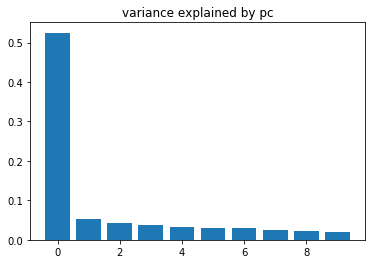

In [90]:
# plot the variance explained by pcs
plt.bar(range(10),sklearn_pca.explained_variance_ratio_)
plt.title('variance explained by pc')
plt.show()

# (c) The explained variance

In [91]:
# check the explained variance reatio
sklearn_pca.explained_variance_ratio_

array([0.52494104, 0.0518328 , 0.0416582 , 0.03691347, 0.0333317 ,
       0.02968214, 0.02867244, 0.0259531 , 0.02313039, 0.02073053])

In [92]:
sum(sklearn_pca.explained_variance_ratio_)

0.8168458054980813

In [93]:
# we are interesting to the relative importance of each components.so we will normalize the values.
cal_weight=lambda x:x/x.sum()
get_weight=cal_weight(sklearn_pca.explained_variance_ratio_)
get_weight # The first component lready explains about 51.7% of the variability in the 26 stocks

array([0.64264398, 0.06345481, 0.05099885, 0.04519025, 0.04080537,
       0.03633751, 0.03510141, 0.03177234, 0.02831671, 0.02537876])

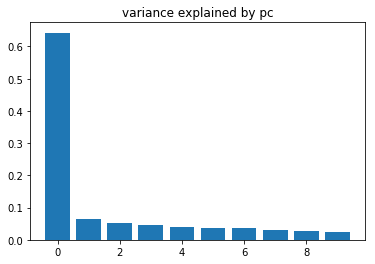

In [95]:
# plot the weight of the variance explained by pcs
plt.bar(range(10),get_weight)
plt.title('variance explained by pc')
plt.show()

In [94]:
sklearn_pca.explained_variance_ratio_.cumsum() # Cumulative weights.

array([0.52494104, 0.57677383, 0.61843203, 0.6553455 , 0.6886772 ,
       0.71835934, 0.74703178, 0.77298488, 0.79611527, 0.81684581])

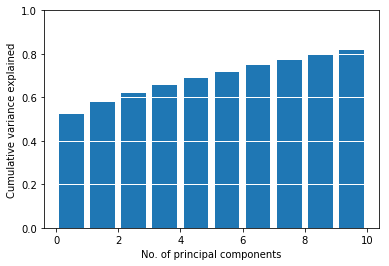

In [98]:
plt.bar(np.arange(10) + .5,sklearn_pca.explained_variance_ratio_.cumsum())
plt.ylim((0, 1))
plt.xlabel('No. of principal components')
plt.ylabel('Cumulative variance explained')
plt.grid(axis = 'y', ls = '-', lw = 1, color = 'white')
plt.show()

# (d ) Constructing the total return index for the active investment
 The first components holds the maximum variance. The portfolio holds the maxiumn risk and gets much profits. Many people think the first component is nearly to the stocks market, the views may be wrong. the stocks market should hold a low risk. The intention of asset allocation is divestified the risks of the market. the people are favorite to the risk that they will choose the first components to construct the portfolio chasing the exccess the profits. Those investors implement active investment.
 The first principal compnent is the linear combination with maximum variance.

In [99]:
# get the Principal components
pcs =sklearn_pca.components_
# first component
pc1 = pcs[0,:]
pc1

array([0.1723723 , 0.30564557, 0.19017793, 0.21096231, 0.25197348,
       0.20888911, 0.21376019, 0.11315983, 0.21824559, 0.1832316 ,
       0.2344606 , 0.29024853, 0.19210635, 0.15312176, 0.20475203,
       0.11336513, 0.11532624, 0.15917741, 0.18650773, 0.15315087,
       0.11404792, 0.19645488, 0.21022012, 0.13914948, 0.19906519,
       0.10208732, 0.18149837])

In [100]:
pc10=pcs[9,:]
pc10  # if element is negative, set zero for it.

array([ 0.07278278, -0.38732686, -0.16566696,  0.39289832, -0.24628201,
       -0.24840807,  0.05618506, -0.05328941, -0.02844737, -0.19909307,
        0.52733224,  0.09725705, -0.02825416,  0.07696198,  0.04719878,
        0.02781437, -0.04417338,  0.08480267, -0.2983333 ,  0.0991107 ,
       -0.04600841,  0.15626414,  0.00058194, -0.04634801,  0.24334469,
       -0.0292842 ,  0.0085609 ])

In [101]:
pc10[pc10<0]=0 # General condition, some stocks will not be shorted, therefore we will change the negative to zero. 
               #  it will be satisfied the requestment of the markert.
pc10

array([0.07278278, 0.        , 0.        , 0.39289832, 0.        ,
       0.        , 0.05618506, 0.        , 0.        , 0.        ,
       0.52733224, 0.09725705, 0.        , 0.07696198, 0.04719878,
       0.02781437, 0.        , 0.08480267, 0.        , 0.0991107 ,
       0.        , 0.15626414, 0.00058194, 0.        , 0.24334469,
       0.        , 0.0085609 ])

In [106]:
# normalized to 1 
pc1_w = np.asmatrix(pc1/sum(pc1)).T
pc10_w = np.asmatrix(pc10/sum(pc10)).T

In [107]:
# apply our first and last componenet as weight of the stocks
pc1_ret = stocks_ret.values*pc1_w
# get the total return index of the first PC portfolio
pc1_ret = pd.DataFrame(data =pc1_ret, index= stocks_ret.index)
pc1_ret_idx= (pc1_ret+1).cumprod()
pc1_ret_idx.columns =['pc1']
pc1_ret_idx.head()

pc1
Date                
2008-03-20  1.032714
2008-03-24  1.046192
2008-03-25  1.048322
2008-03-26  1.038316
2008-03-27  1.025208

In [108]:
# apply our last componenet as weight of the stocks
pc10_ret = stocks_ret.values*pc10_w

# get the total return index of the last PC portfolio
pc10_ret = pd.DataFrame(data =pc10_ret, index= stocks_ret.index)
pc10_ret_idx= (pc10_ret+1).cumprod()
pc10_ret_idx.columns =['pc10']
pc10_ret_idx.head()

pc10
Date                
2008-03-20  1.042395
2008-03-24  1.040934
2008-03-25  1.047602
2008-03-26  1.044819
2008-03-27  1.028934

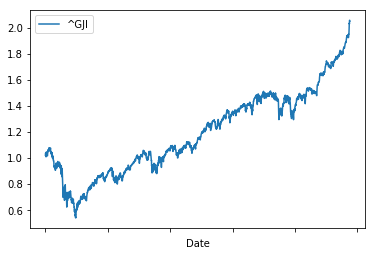

In [115]:
#get the DowJones index and calculate the ret of DJ index.
ab='^DJI'+'.csv'
data = pd.read_csv(ab)
data.index=data.Date
dji=data['Adj Close']
dji=pd.DataFrame(data =dji.values,columns=['^DJI'], index= dji.index)
dji=dji.loc[stocks_data.index]
#get the return of DJ index
dji_ret=dji.pct_change()
dji_ret=dji_ret[1:]
# get the cumulative return of the DJ index
dji_ret_idx= (dji_ret+1).cumprod()
dji_ret_idx.columns= ['^GJI']

dji_ret_idx.plot()
plt.show()

In [110]:
# plot the total return index of the last PC portfolio and DJ index
ret_index = dji_ret_idx
ret_index['pc1'] = pc1_ret_idx['pc1']
ret_index['pc10'] = pc10_ret_idx['pc10']

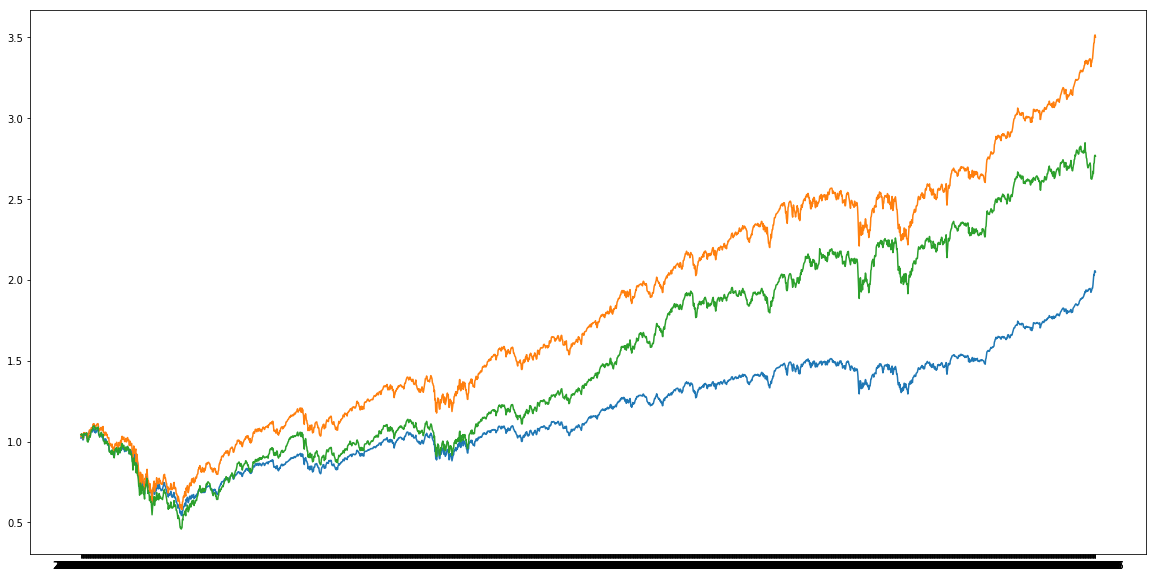

In [120]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(ret_index)
plt.show()

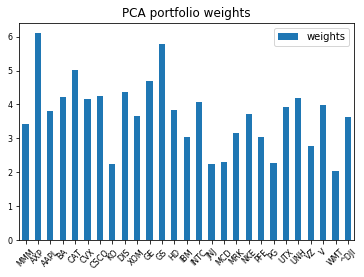

In [121]:
# plot the weights in the first PC
weights_df = pd.DataFrame(data = pc1_w*100,index = stocks_ret.columns)
weights_df.columns=['weights']

weights_df.plot.bar(title='PCA portfolio weights',rot =45,fontsize =8)
plt.show()

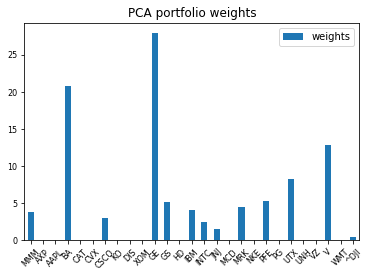

In [122]:
# plot the weights in the last PC
weights_df = pd.DataFrame(data = pc10_w*100,index = stocks_ret.columns)
weights_df.columns=['weights']

weights_df.plot.bar(title='PCA portfolio weights',rot =45,fontsize =8)
plt.show()

### Conclusion:
From the PCA analysis of covariance of stocks' return, it can be the rule for choosing stocks. Risk and return always stay together, so we analysis the maximum of covariance by PCA, the generalized data cannot used here. The sotcks' return data are used to analysising the charactors. How to choose stocks and allocate the assets? we can use the PCA techinical to manage the portfolio and divistify the risk and get excess profit.

### (e) Constructing the market index for postive investment
Some people averse the risk and dislike the risk in processing of investing, how to avoid the risk and follow the securities market to acquire the return? At first, diversitified the investing assets. secondly, constructing the market index for avoiding the risk.Now, we will constructing the market index by using serveral stocks only.

In [124]:
### linear combination
import statsmodels.api as sm

X = stocks_ret
y = dji_ret

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ^DJI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.298e+31
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:13:40   Log-Likelihood:                 89981.
No. Observations:                2440   AIC:                        -1.799e+05
Df Residuals:                    2413   BIC:                        -1.798e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MMM        -6.453e-16   6.16e-17    -10.468      0.000   -7.66e-16   -5.24e-16
AXP         2.949e-16   3.29e-17      8.976      0.000     2.3e-16    3.59e-16
AAPL       -1.041e-17   3.18e-17     -0.327      0.744   -7.28e-17     5.2e-17
BA           -3.4e-16   4.22e-17     -8.054      0.000   -4.23e-16   -2.57e-16
CAT         3.521e-16   3.86e-17      9.120      0.000    2.76e-16    4.28e-16
CVX        -5.898e-17   6.13e-17     -0.962      0.336   -1.79e-16    6.12e-17
CSCO       -1.561e-17   3.78e-17     -0.413      0.680   -8.98e-17    5.85e-17
KO         -1.717e-16   5.67e-17     -3.029      0.002   -2.83e-16   -6.05e-17
DIS         9.194e-17   4.66e-17      1.975      0.048    6.55e-19    1.83e-16
XOM        -2.776e-17    6.9e-17     -0.402      0.688   -1.63e-16    1.08e-16
GE         -1.978e-16   3.43e-17     -5.768      0.000   -2.65e-16   -1.31e-16
GS         -1.284e-16   3.03e-17     -4.239      0.000   -1.88e-16    -6.9e-17
HD         -5.378e-17   4.44e-17     -1.212      0.226   -1.41e-16    3.32e-17
IBM        -1.041e-17   5.55e-17     -0.188      0.851   -1.19e-16    9.84e-17
INTC       -7.112e-17      4e-17     -1.777      0.076    -1.5e-16    7.38e-18
JNJ        -2.637e-16   7.36e-17     -3.585      0.000   -4.08e-16   -1.19e-16
MCD        -3.469e-17    5.7e-17     -0.609      0.543   -1.46e-16     7.7e-17
MRK        -3.816e-17   4.16e-17     -0.918      0.359    -1.2e-16    4.34e-17
NKE        -2.533e-16   3.59e-17     -7.047      0.000   -3.24e-16   -1.83e-16
PFE        -1.249e-16   5.12e-17     -2.438      0.015   -2.25e-16   -2.44e-17
PG          1.041e-17   6.41e-17      0.162      0.871   -1.15e-16    1.36e-16
UTX        -6.245e-17   6.15e-17     -1.016      0.310   -1.83e-16    5.81e-17
UNH        -4.025e-16    2.9e-17    -13.863      0.000   -4.59e-16   -3.46e-16
VZ          2.082e-17   4.99e-17      0.417      0.677   -7.71e-17    1.19e-16
V          -3.643e-17   3.28e-17     -1.110      0.267   -1.01e-16    2.79e-17
WMT         2.168e-17   5.01e-17      0.433      0.665   -7.65e-17     1.2e-16
^DJI           1.0000   3.09e-16   3.24e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      641.322   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14352.868
Skew:                           0.698   Prob(JB):                         0.00
Kurtosis:                      14.799   Cond. No.                         42.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

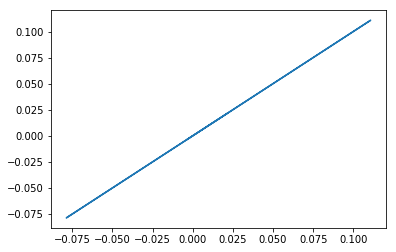

In [125]:
plt.plot(y,predictions)
plt.show()   # we can simulate the market index by linear regress by using some stocks we choose.Fro the plot, 
# it is good at fitting the market index. 

### Conclusion:
To take advantage of the simple linear regression, we can construct a market index by several stocks only and acquire the same as the return of the market. At the same time, we can avoid the risk of market.Investors averse the risk, they can using the stragies to follow the track of the market and get the average return of the market and donot need to take special risk.

### 4. Further discusions:
Some people researh on the market and like constructing the market index by using the stocks price, it can not make sense. many conclusion is confussing. risk and return are a twin brothers in the captial market. In PCA, there shows the charactors of variance of return.
How to acquire the excess profits from the market? it is worthy to research deeply on the stocks' variance, which disclose the stocks' risk.
We can construt a portfolio to delimite the risk and get much profit by PCA technical. In the above analysis, we can use many technical to implement trading in market, it is easy to get the excess profit to the market.
